In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\Desktop\\churn_prediction (1).csv')

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.shape

(28382, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [7]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [8]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

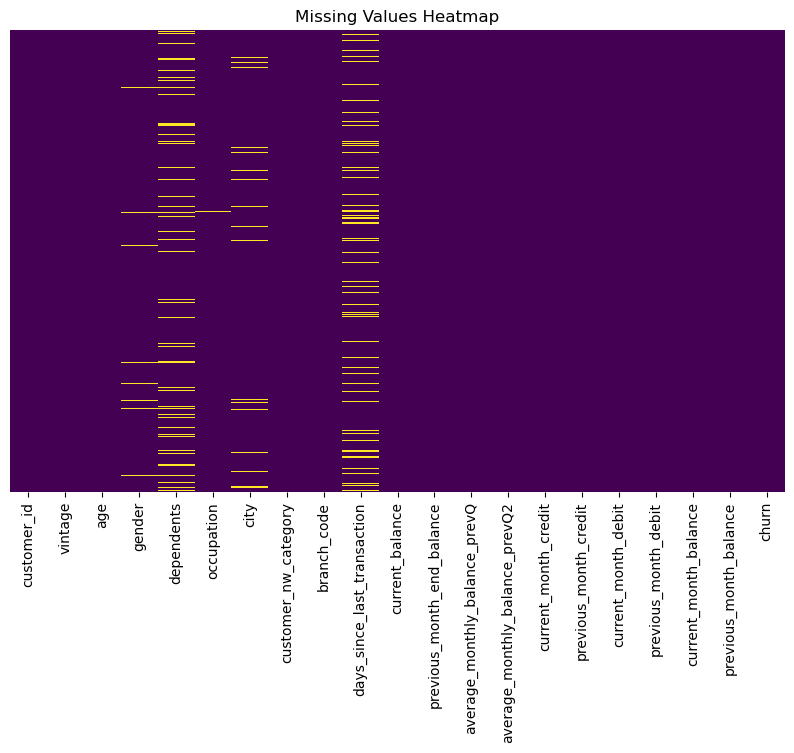

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Dependents: Missing values in the "dependents" column could occur if the dataset does not capture information about the number of dependents for certain individuals. This might happen if the data collection process did not prompt individuals to provide this information or if they chose not to disclose it.

City: Missing values in the "city" column might occur if the dataset does not contain information about the city of residence for certain individuals. This could happen if the data collection process did not collect this information or if individuals did not provide it.

Days_since_last_transaction: Missing values in the "days_since_last_transaction" column might occur if there are no records of transactions for certain individuals in the dataset. This could happen if the dataset only includes transaction data for a subset of customers or if there are data recording issues.

Gender and Occupation: Missing values in the "gender" and "occupation" columns could occur due to various reasons such as voluntary non-disclosure, data entry errors, or data processing issues. Some individuals may choose not to disclose their gender or occupation information, while others may not provide it for other reasons.

In [10]:
missing_cols = ['dependents', 'city', 'days_since_last_transaction','gender','occupation']


In [11]:
for col in missing_cols:
    # Count the occurrences of missing values in each column
    missing_count = df[col].isnull().sum()
    print(f"Column '{col}' has {missing_count} missing values")


Column 'dependents' has 2463 missing values
Column 'city' has 803 missing values
Column 'days_since_last_transaction' has 3223 missing values
Column 'gender' has 525 missing values
Column 'occupation' has 80 missing values


In [12]:
# For demonstration, let's fill missing values with the mean for numerical columns and mode for categorical columns
for col in missing_cols:
    if df[col].dtype == 'object':
        # For categorical columns, fill missing values with mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with mean
        df[col].fillna(df[col].mean(), inplace=True)



In [13]:
# Verify that missing values have been filled
print(df.isnull().sum())

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64


In [14]:
(df[df['churn']==1].shape[0]/df.shape[0])*100 



18.532872947642872

You can use this calculation to understand the proportion of customers who have churned, which is important for analyzing churn rates and making decisions related to customer retention strategies.
The result, 18.532872947642872, represents the percentage of churned customers in your dataset. This means that approximately 18.53% of the total customers in your dataset have churned.

In [15]:
churn=df['churn'].value_counts().reset_index()
churn.head()

,index,churn
0,0,23122
1,1,5260


This DataFrame provides a summary of the churn distribution in your dataset, showing the count of non-churned and churned customers.

<Axes: xlabel='index', ylabel='churn'>

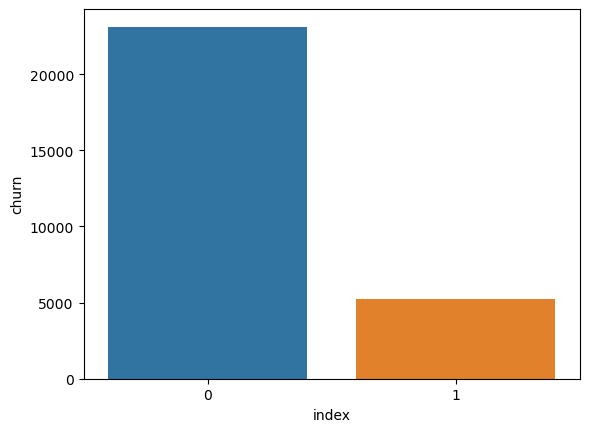

In [16]:
sns.barplot(x=churn['index'],y=churn['churn'])

<Axes: xlabel='vintage', ylabel='Density'>

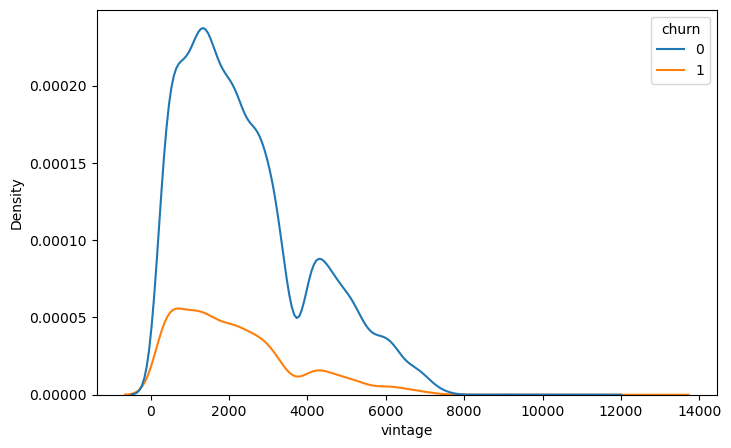

In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['vintage'],hue=df['churn'])

the above graph shows the relatiobship between churn and vintage.The lesser the vintage, more the chances to churn. so, one of the ways to reduce churning would be retain the customers for longer, so it reduces the chances of churning. 

In [18]:
churning=df[df['churn']==1]
churning.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3,5,478,90,Male,0.347236,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.000000,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
12,14,2438,73,Male,0.000000,retired,44.0,3,409,47.0,...,5728.66,1794.39,137.25,0.33,500.33,5098.90,508.53,2541.22,2612.60,1
14,16,2314,48,Female,0.000000,self_employed,665.0,2,569,52.0,...,5489.14,6532.99,7720.34,0.66,661.73,0.66,2811.53,5437.04,6633.94,1
16,19,2723,49,Male,0.000000,self_employed,1125.0,3,1023,0.0,...,3183.27,3021.27,1710.93,190.71,113.64,2461.66,1257.41,1950.95,3127.00,1


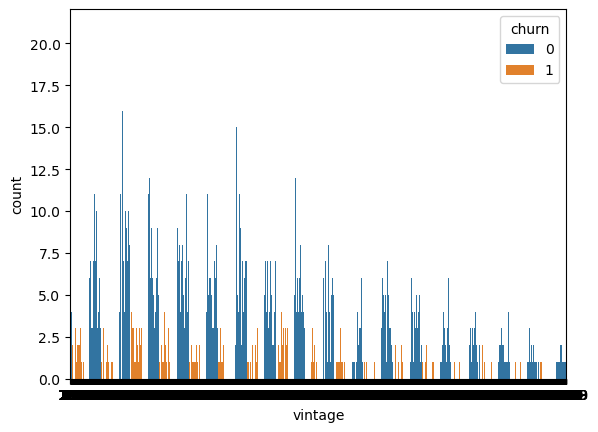

In [19]:
dev=sns.countplot(x=df['vintage'],hue=df['churn'])


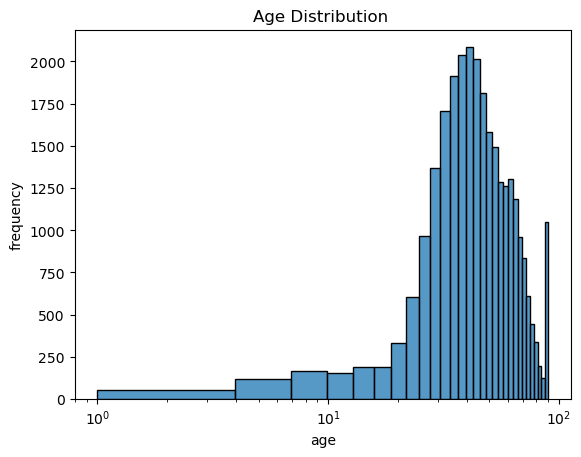

In [20]:
sns.histplot(df['age'],bins=30)
plt.title('Age Distribution ')
plt.xlabel('age')
plt.ylabel('frequency')
plt.xscale('log')
plt.show()

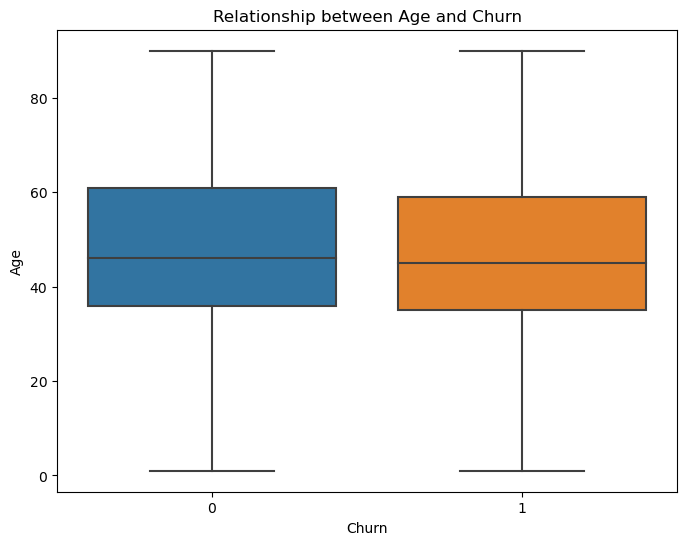

In [21]:
# Plotting the relationship between age and churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='age', data=df)
plt.title('Relationship between Age and Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


 age does not significantly affect the churning rate. However, customers above 80 and below 20 years of age less likely to churn

In [22]:
# Calculating the mean age for churned and non-churned customers
mean_age_churned = df[df['churn'] == 1]['age'].mean()
mean_age_non_churned = df[df['churn'] == 0]['age'].mean()
print("Mean age for churned customers:", mean_age_churned)
print("Mean age for non-churned customers:", mean_age_non_churned)

Mean age for churned customers: 47.461216730038025
Mean age for non-churned customers: 48.378297725110286


the mean of the age for churned and non churned customers represents that there is no such difference between mean age, so suggests that age may not be a strong predictor of churn

In [23]:
print(df['gender'].unique())
df.dropna(subset=['gender'],inplace=True)
df['gender']=df['gender'].str.strip()
print(df['gender'].dtype)

['Male' 'Female']
object


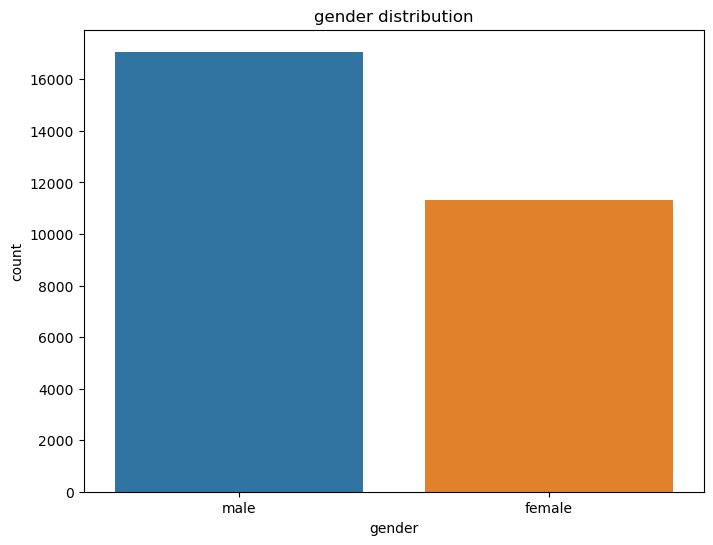

In [24]:
df['gender']=df['gender'].str.lower()
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', order=['male','female'])
plt.title('gender distribution')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [25]:
print(df['gender'].value_counts())

male      17073
female    11309
Name: gender, dtype: int64


Amongst the customers, we have more males than females here.

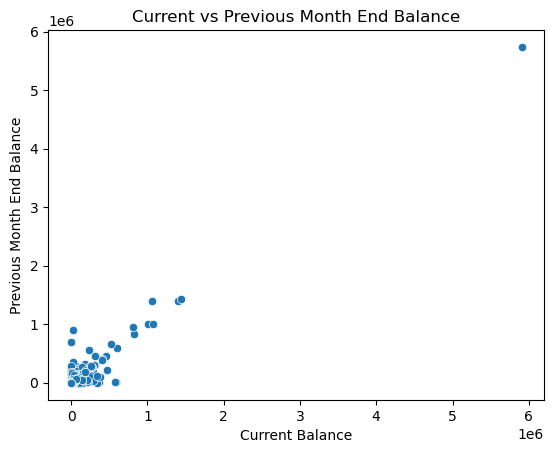

In [26]:
sns.scatterplot(x='current_balance', y='previous_month_end_balance', data=df)
plt.title('Current vs Previous Month End Balance')
plt.xlabel('Current Balance')
plt.ylabel('Previous Month End Balance')
plt.show()

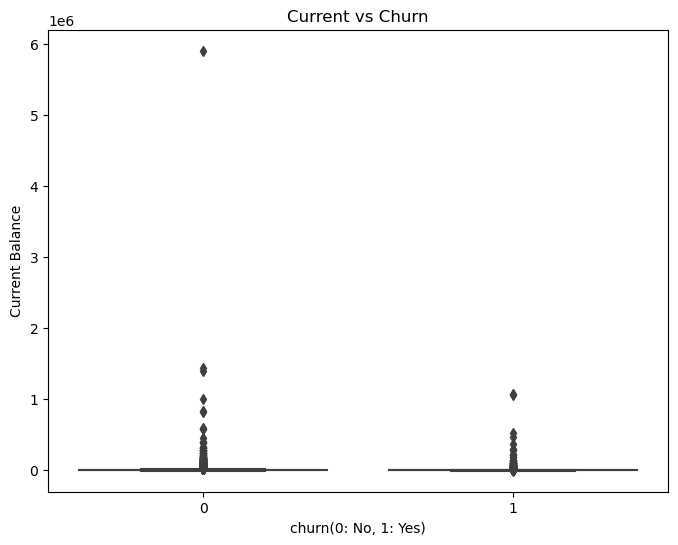

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='churn', y='current_balance', data=df)
plt.title('Current vs Churn') 
plt.ylabel('Current Balance')
plt.xlabel('churn(0: No, 1: Yes)')
plt.show()

In [28]:
from scipy.stats import ttest_ind

In [29]:
churned=df[df['churn']==1]['current_balance']
not_churned=df[df['churn']==0]['current_balance']


In [30]:
t_stat, p_value=ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value<=0.05:
    print("there is a significant difference in current balances between churned and not churned")
else:
    print("there is no significant difference in current balances between churned and not churned")

T-statistic: -4.074848363855143
P-value: 4.616948839784585e-05
there is a significant difference in current balances between churned and not churned


since p value is lesser than 0.05, we reject the null hypothesis. this suggests that there is a significant difference in current balances between churned and not churned.
it indicates that current balance is  a significant factor in predicting churn

Box plot for outlier detection : identify outliers in numerical features

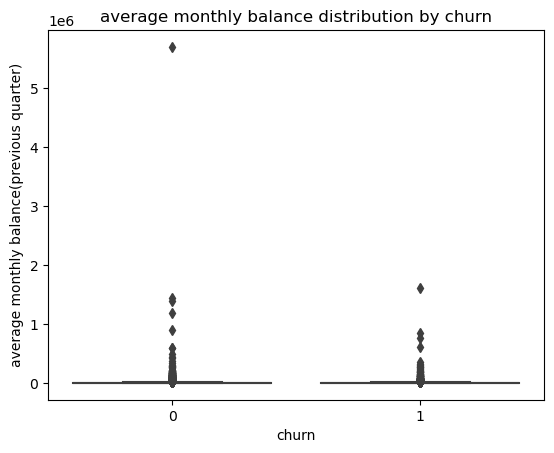

In [31]:
sns.boxplot(x='churn',y='average_monthly_balance_prevQ',data=df)
plt.title('average monthly balance distribution by churn')
plt.xlabel('churn')
plt.ylabel('average monthly balance(previous quarter)')
plt.show()


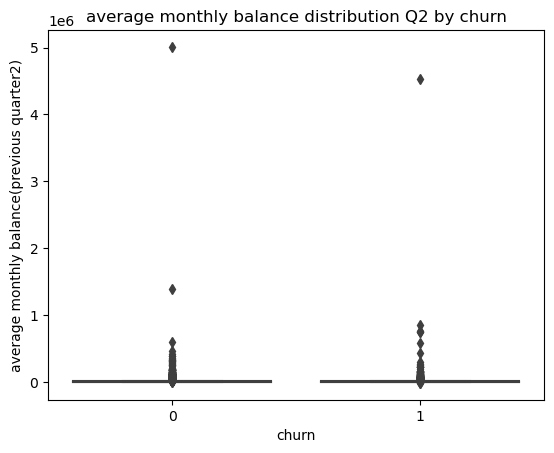

In [32]:
sns.boxplot(x='churn',y='average_monthly_balance_prevQ2',data=df)
plt.title('average monthly balance distribution Q2 by churn')
plt.xlabel('churn')
plt.ylabel('average monthly balance(previous quarter2)')
plt.show()


In [33]:
print(df.groupby('churn')['age'].mean())

churn
0    48.378298
1    47.461217
Name: age, dtype: float64


correlation analysis : analyze pairwise correlation between numerical features

                            current_balance  previous_month_end_balance
current_balance                    1.000000                    0.947276
previous_month_end_balance         0.947276                    1.000000


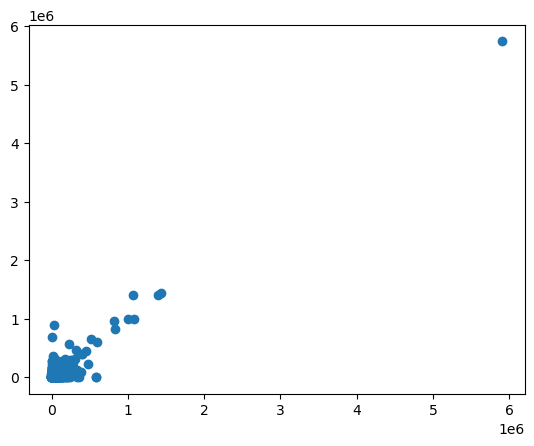

In [34]:
print(df[['current_balance','previous_month_end_balance']].corr())
plt.scatter(df['current_balance'],df['previous_month_end_balance'])

In [35]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2256\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008227,0.000733,0.009618,-0.000286,0.009665,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.034681,0.043637,-0.167366,-0.380714,-0.084282,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000570,0.015245,-0.076532,-0.058990,-0.015311,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008227,0.034681,-0.000570,1.000000,0.001785,0.012593,0.018303,-0.073696,-0.001643,0.000121,0.000675,0.001221,0.003239,0.024737,0.008024,0.030375,-0.000352,0.000709,0.031818
city,0.000733,0.043637,0.015245,0.001785,1.000000,0.006534,-0.060204,-0.004007,-0.005646,-0.004084,-0.006289,-0.007880,0.004117,0.008073,0.001463,0.005965,-0.005789,-0.005831,-0.001561
customer_nw_category,0.009618,-0.167366,-0.076532,0.012593,0.006534,1.000000,0.235059,0.047040,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.018303,-0.060204,0.235059,1.000000,0.036956,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.009665,-0.084282,-0.015311,-0.073696,-0.004007,0.047040,0.036956,1.000000,-0.019538,-0.014068,-0.012409,-0.006252,-0.033127,-0.071602,-0.039144,-0.070093,-0.017424,-0.011466,-0.053824
current_balance,0.006589,0.002986,0.054346,-0.001643,-0.005646,-0.058314,0.000181,-0.019538,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000121,-0.004084,-0.059854,0.000214,-0.014068,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [36]:
print("mean age for churned customers:",df[df['churn']==1]['age'].mean())
print("correlation between current balance and previous month end balance:",df['current_balance'].corr(df['previous_month_end_balance']))

mean age for churned customers: 47.461216730038025
correlation between current balance and previous month end balance: 0.9472755077987904


the mean age of churned customers is 47.461216730038025
correlation coefficient between current balance and previous month end balance is  0.9472755077987904. indicates a strong positive correlation between these two variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


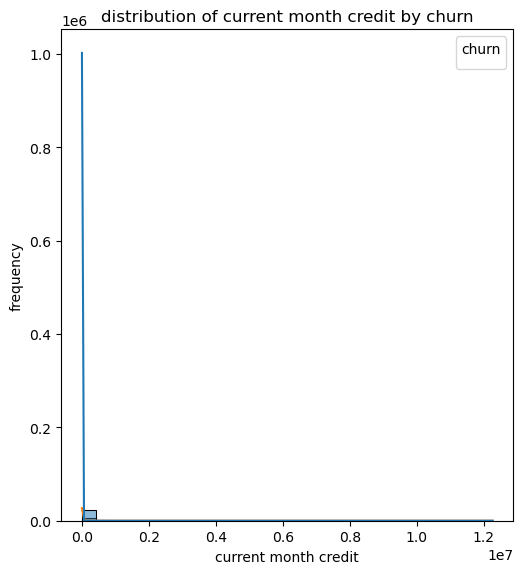

In [37]:
plt.figure(figsize=(10,6))
#plot histograms for credit
plt.subplot(1,2,1)
sns.histplot(data=df,x='current_month_credit',hue='churn',kde=True,bins=30)
plt.title('distribution of current month credit by churn')
plt.xlabel('current month credit')
plt.ylabel('frequency')
plt.legend(title='churn',loc='upper right')


# show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


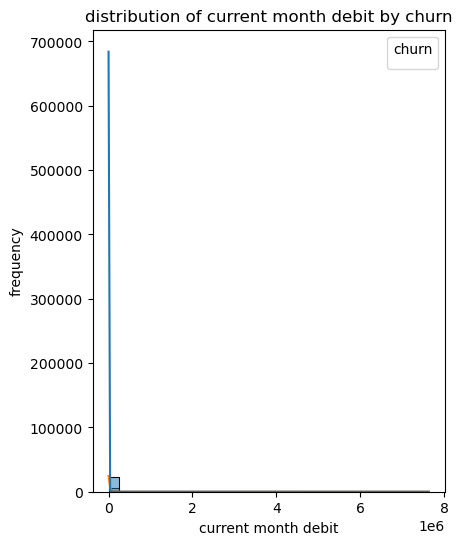

In [38]:
plt.figure(figsize=(10,6))
#plot histograms for credit
plt.subplot(1,2,1)
sns.histplot(data=df,x='current_month_debit',hue='churn',kde=True,bins=30)
plt.title('distribution of current month debit by churn')
plt.xlabel('current month debit')
plt.ylabel('frequency')
plt.legend(title='churn',loc='upper right')


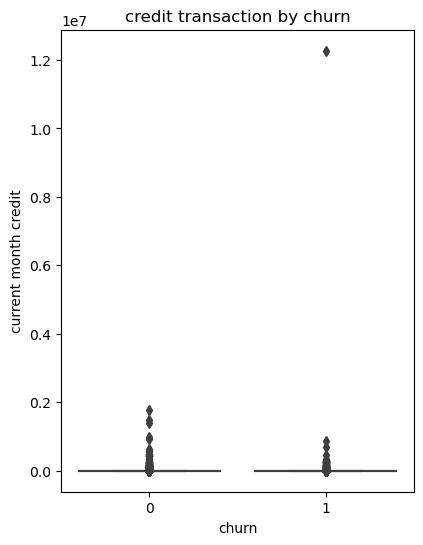

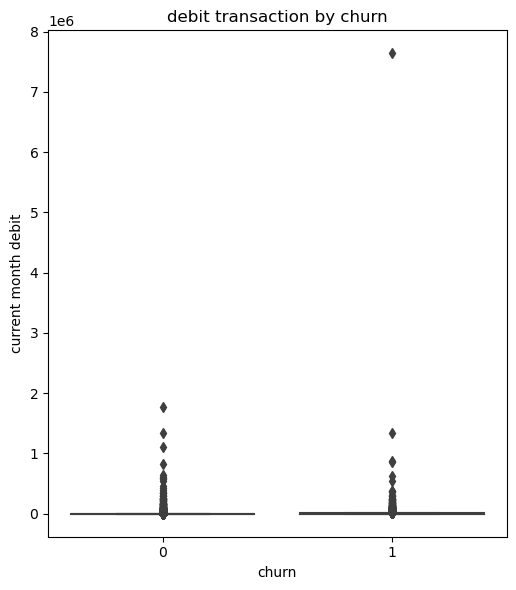

In [39]:
#visualize transaction patterns with box plot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x='churn',y='current_month_credit',data=df)
plt.title('credit transaction by churn')
plt.ylabel('current month credit')
plt.xlabel('churn')

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x='churn',y='current_month_debit',data=df)
plt.title('debit transaction by churn')
plt.ylabel('current month debit')
plt.xlabel('churn')
plt.tight_layout()
plt.show()

In [40]:
# calculation of correlation coefficients
correlation_credit=df['current_month_credit'].corr(df['churn'])
correlation_debit=df['current_month_debit'].corr(df['churn'])
print("correlation between credit transactions and churn:",correlation_credit)
print("correlation between debit transactions and churn:",correlation_debit)

correlation between credit transactions and churn: 0.020754772255403783
correlation between debit transactions and churn: 0.04804133874295542


In [41]:
# t test for credit transaction
credit_churned=df[df['churn']==1]['current_month_credit']
credit_not_churned=df[df['churn']==0]['current_month_credit']
t_stat_credit, p_value_credit = ttest_ind(credit_churned, credit_not_churned)
print(" T stats for credit transactions:",t_stat_credit)
print(" p value for credit transactions:",p_value_credit)

 T stats for credit transactions: 3.4971779088996824
 p value for credit transactions: 0.00047092692218872153


p value is less than significant values(0.05) , we reject the null hypothesis.
this suggests that there is a significant difference in credit transactions between churned and non churned customers

In [42]:
debit_churned=df[df['churn']==1]['current_month_debit']
debit_not_churned=df[df['churn']==0]['current_month_debit']
t_stat_debit, p_value_debit = ttest_ind(debit_churned, debit_not_churned)
print(" T stats for debit transactions:",t_stat_debit)
print(" p value for debit transactions:",p_value_debit)

 T stats for debit transactions: 8.102574731878711
 p value for debit transactions: 5.595124170707717e-16


p value is greater than significant values(0.05) , we reject the null hypothesis. this suggests that there is  significant difference in debit transactions between churned and non churned customers

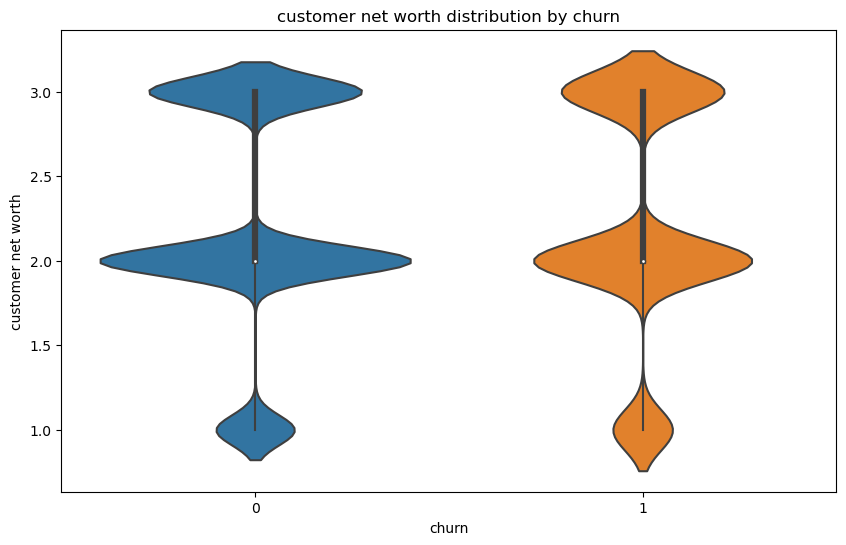

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(x='churn',y='customer_nw_category',data=df)
plt.title('customer net worth distribution by churn')
plt.ylabel('customer net worth')
plt.xlabel('churn')
plt.show()


the distribution of customer net woth does not show significant differences between churned and not churned customers

<Figure size 1000x600 with 0 Axes>

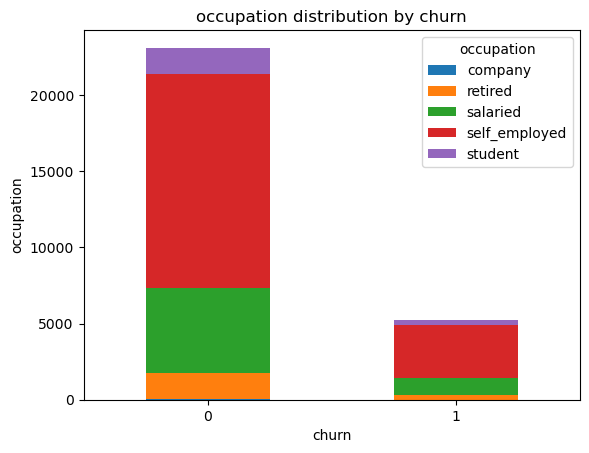

In [44]:
occupation_counts=df.groupby(['churn','occupation']).size().unstack()
plt.figure(figsize=(10,6))
occupation_counts.plot(kind='bar',stacked=True)
plt.title('occupation distribution by churn')
plt.ylabel('occupation')
plt.xlabel('churn')
plt.xticks(rotation=0)
plt.legend(title='occupation',loc='upper right')
plt.show()


In [45]:
# Count the number of occurrences of each occupation category for churned customers
churned_occupation_counts = df[df['churn'] == 1]['occupation'].value_counts()

# Count the number of occurrences of each occupation category for non-churned customers
non_churned_occupation_counts = df[df['churn'] == 0]['occupation'].value_counts()

# Calculate the total number of churned and non-churned customers
total_churned_customers = len(df[df['churn'] == 1])
total_non_churned_customers = len(df[df['churn'] == 0])

# Calculate the percentage of each occupation category among churned customers
churned_occupation_percentages = (churned_occupation_counts / total_churned_customers) * 100

# Calculate the percentage of each occupation category among non-churned customers
non_churned_occupation_percentages = (non_churned_occupation_counts / total_non_churned_customers) * 100

print("Percentage of each occupation category among churned customers:")
print(churned_occupation_percentages)

print("\nPercentage of each occupation category among non-churned customers:")
print(non_churned_occupation_percentages)


Percentage of each occupation category among churned customers:
self_employed    66.159696
salaried         21.806084
student           6.159696
retired           5.798479
company           0.076046
Name: occupation, dtype: float64

Percentage of each occupation category among non-churned customers:
self_employed    60.877087
salaried         24.033388
student           7.499351
retired           7.434478
company           0.155696
Name: occupation, dtype: float64


Self-Employed: The percentage of self-employed customers is higher among churned customers (66.16%) compared to non-churned customers (60.88%). This suggests that self-employed individuals may have a slightly higher propensity to churn.

Salaried: The percentage of salaried customers is relatively similar between churned (21.81%) and non-churned (24.03%) customers. Salaried individuals seem to have a consistent churn behavior across both groups.

Student: The percentage of student customers is higher among churned customers (6.16%) compared to non-churned customers (7.50%). This indicates that students may be more likely to churn, albeit with a small difference.

Retired: Retired individuals show a similar pattern to students, with a slightly higher percentage among churned customers (5.80%) compared to non-churned customers (7.43%).

Company: The percentage of customers affiliated with a company is very low in both churned (0.08%) and non-churned (0.16%) groups. This category may not significantly contribute to churn prediction due to its low representation.

In [46]:

from scipy.stats import chi2_contingency

# Perform chi-square test of independence between occupation and churn
observed_freq = pd.crosstab(df['occupation'], df['churn'])
chi2, p_value, _, _ = chi2_contingency(observed_freq)

# Set significance level (alpha)
alpha = 0.05
print(" p value=",p_value)
# Check if p-value is less than alpha
if p_value < alpha:
    print("Occupation is a significant factor in predicting churn (reject null hypothesis)")
else:
    print("Occupation is not a significant factor in predicting churn (fail to reject null hypothesis)")


 p value= 1.2673587479192002e-11
Occupation is a significant factor in predicting churn (reject null hypothesis)


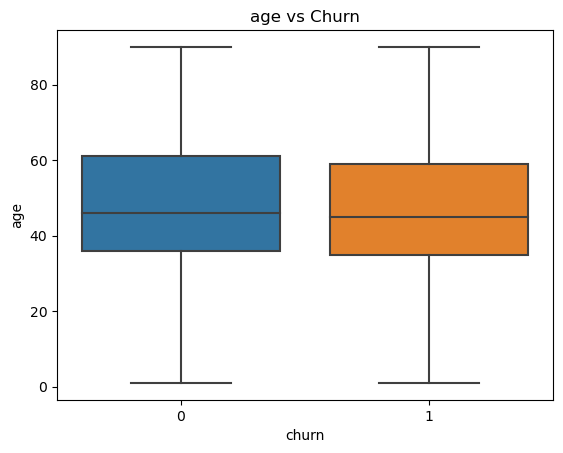

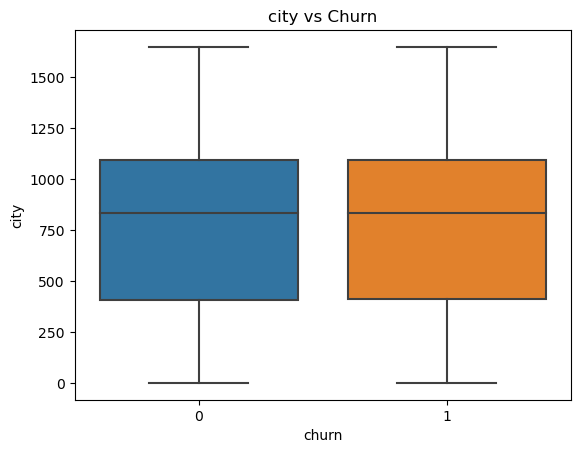

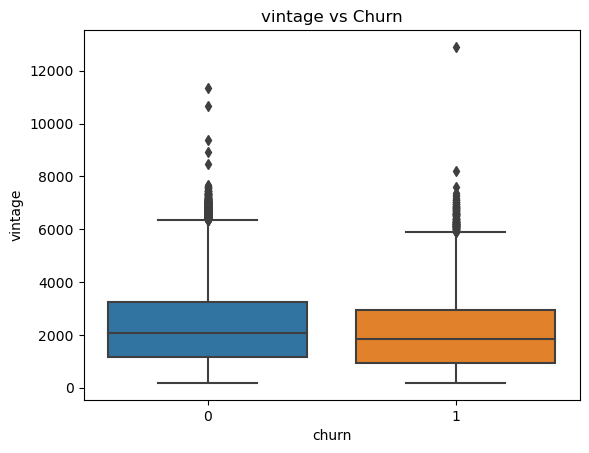

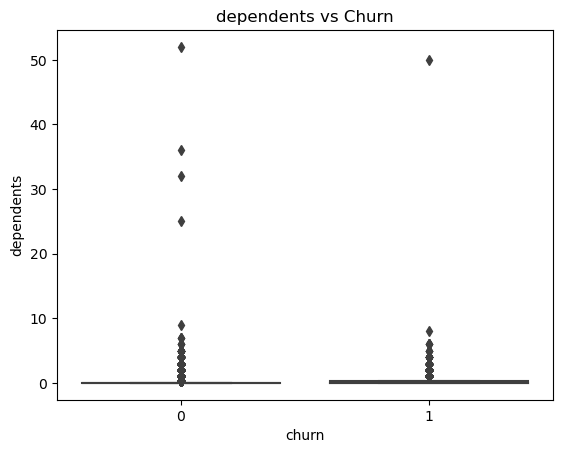

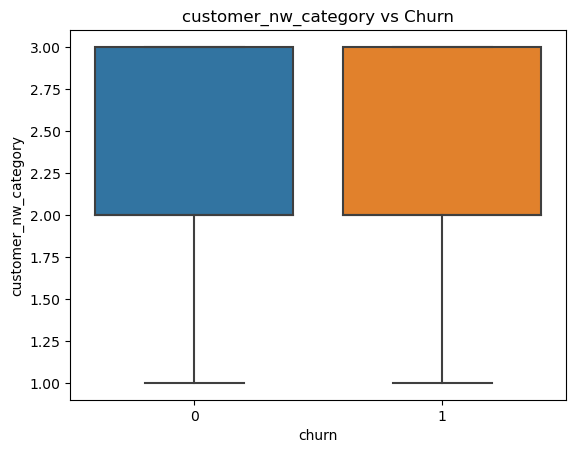

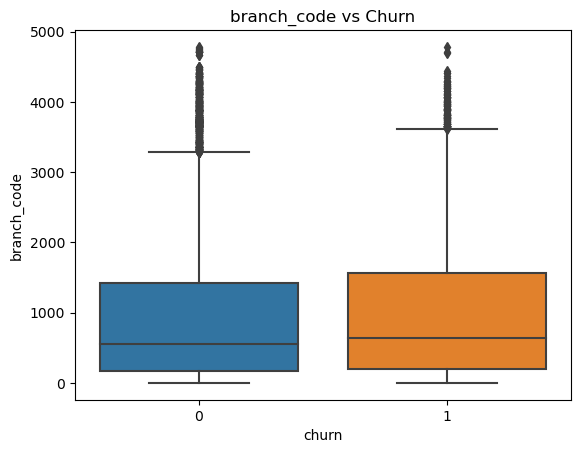

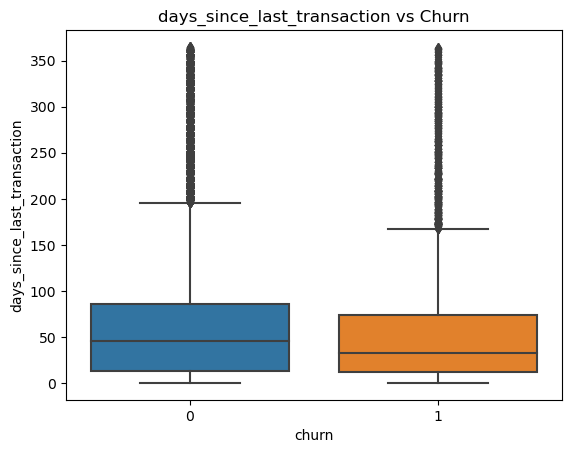

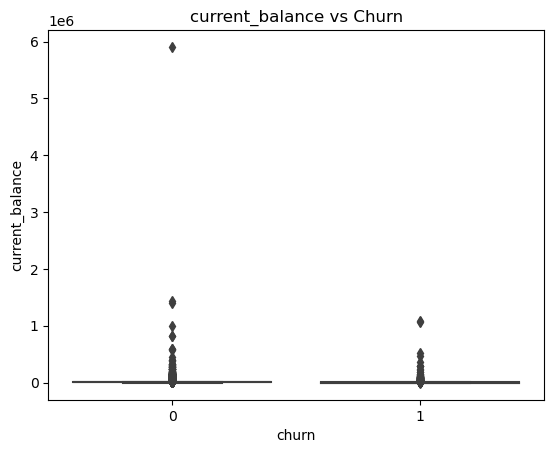

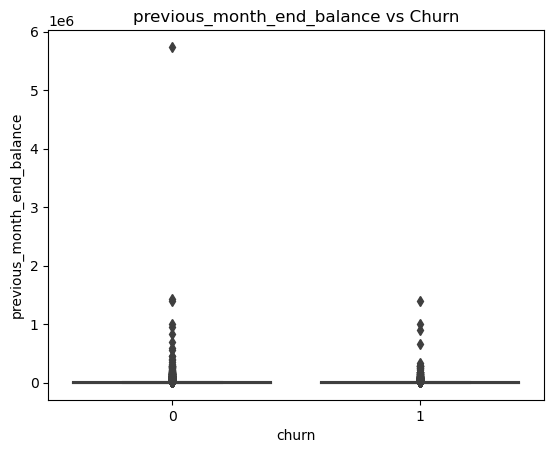

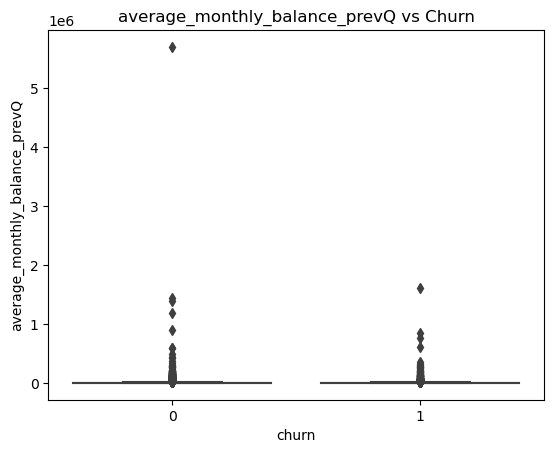

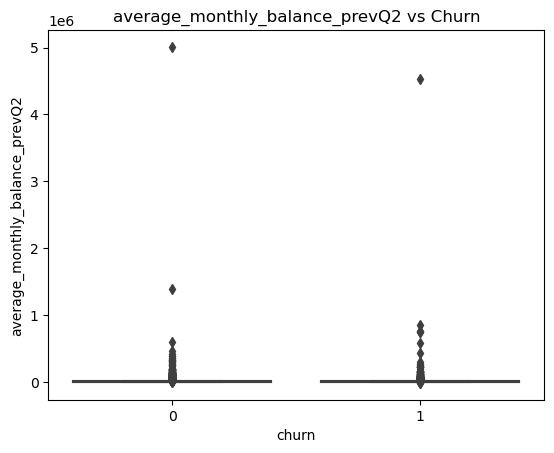

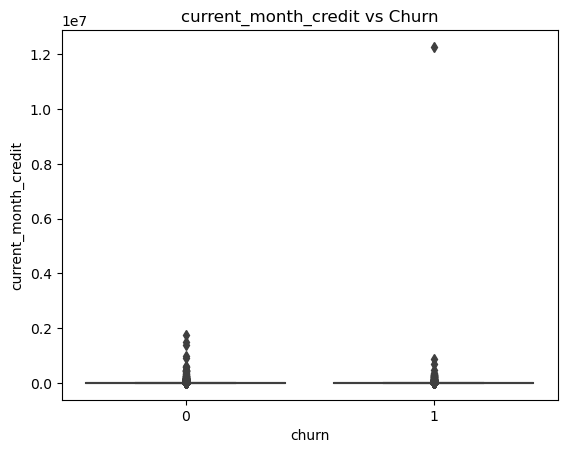

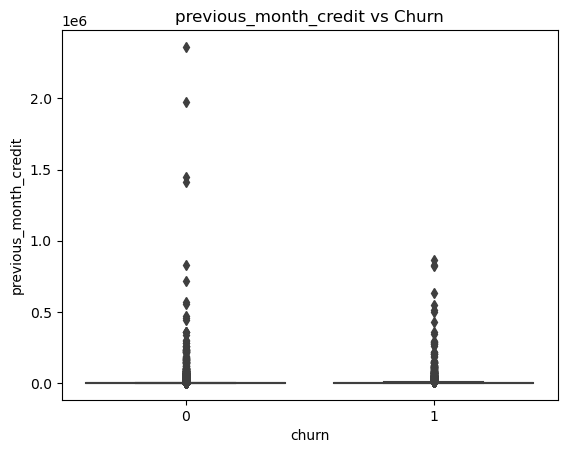

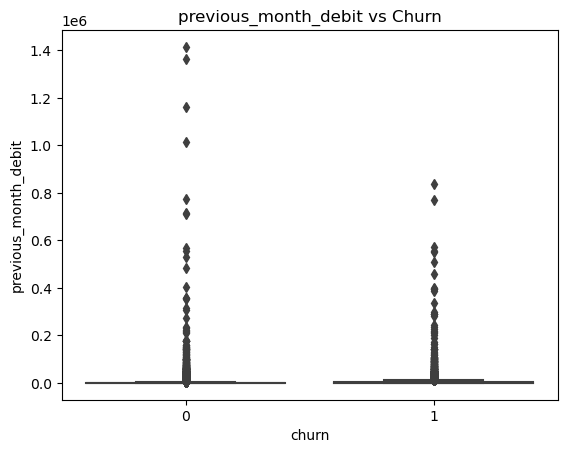

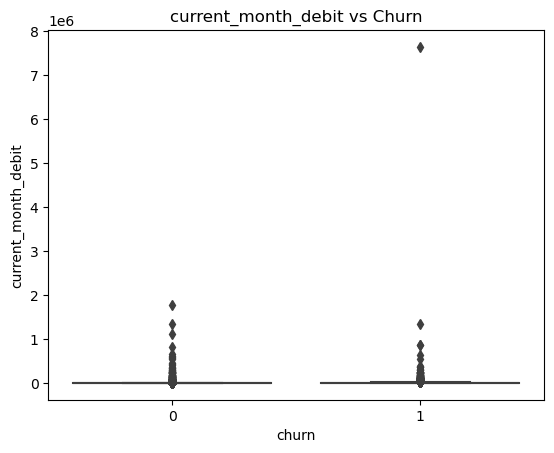

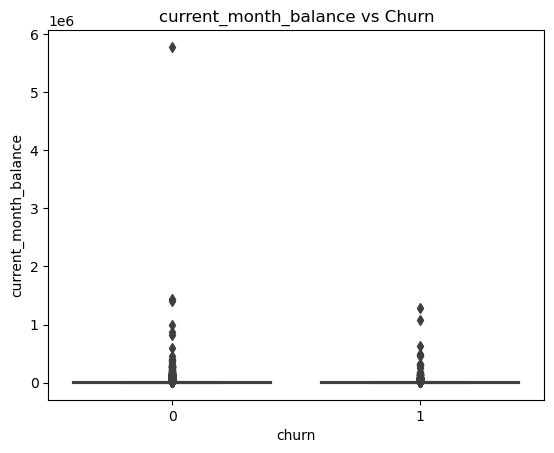

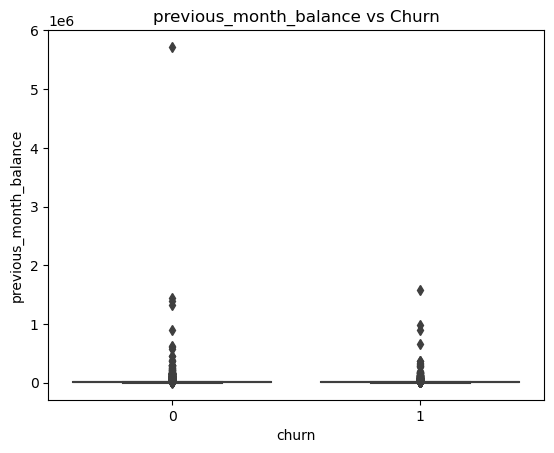

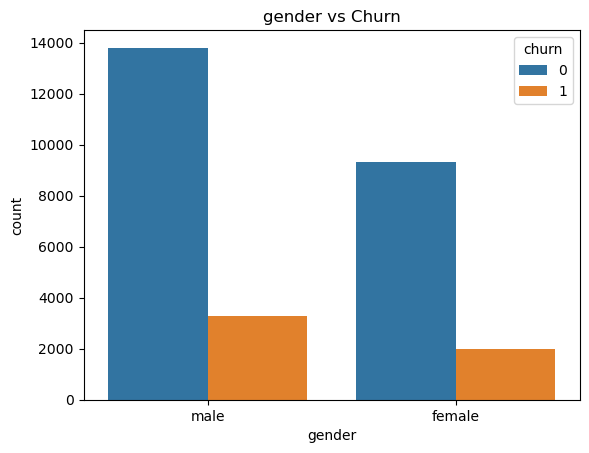

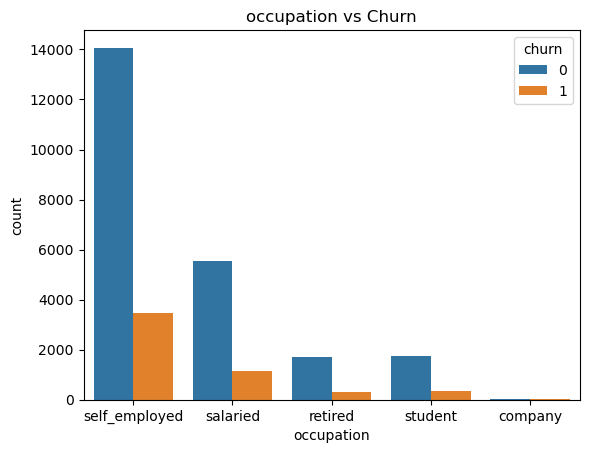

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis for numerical variables
numerical_vars = ['age', 'city', 'vintage', 'dependents', 'customer_nw_category', 'branch_code', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'previous_month_debit', 'current_month_debit', 'current_month_balance', 'previous_month_balance'] 
for var in numerical_vars:
    sns.boxplot(x='churn', y=var, data=df)
    plt.title(f'{var} vs Churn')
    plt.show()

# Bivariate analysis for categorical variables
categorical_vars = ['gender', 'occupation'] 
for var in categorical_vars:
    sns.countplot(x=var, hue='churn', data=df)
    plt.title(f'{var} vs Churn')
    plt.show()


# CONCLUSION

1. This means that approximately 18.53% of the total customers in your dataset have churned.
2. index	churn
   0 	0	23122
   1	1	5260
3. Mean age for churned customers: 47.461216730038025
   Mean age for non-churned customers: 48.378297725110286
   the mean of the age for churned and non churned customers represents that there is no such difference between mean age, so      suggests that age may not be a strong predictor of churn.
   age does not significantly affect the churning rate. However, customers above 80 and below 20 years of age less likely to      churn.
   age does not significantly affect the churning rate. However, customers above 80 and below 20 years of age less likely to      churn.
4. correlation coefficient between current balance and previous month end balance is 0.9472755077987904. indicates a strong        positive correlation between these two variables
5. Amongst the customers, we have more males than females here but is not a significant variable.
6. Not much difference in customer net worth category when it comes to churn
7. T-statistic: -4.074848363855143
   P-value: 4.616948839784585e-05
   there is a significant difference in current balances between churned and not churned
   since p value is lesser than 0.05, we reject the null hypothesis. this suggests that there is a significant difference in      current balances between churned and not churned. it indicates that current balance is a significant factor in predicting      churn.
8. T stats for credit transactions: 3.4971779088996824
   p value for credit transactions: 0.00047092692218872153
   p value is less than significant values(0.05) , we reject the null hypothesis. this suggests that there is a significant        difference in credit transactions between churned and non churned customers.
9. T stats for debit transactions: 8.102574731878711
   p value for debit transactions: 5.595124170707717e-16
   p value is greater than significant values(0.05) , we fail reject the null hypothesis. this suggests that there is no          significant difference in debit transactions between churned and non churned customers.
10. p value= 1.2673587479192002e-11
    Occupation is a significant factor in predicting churn (reject null hypothesis)